## Khoa Học Tự Nhiên
## Lab 7 - ML - Decision Tree and Random Forest
### Nguyễn Quốc Bảo - 18110053

**Lab-07 Decision Tree and Random Forest**

Ở Bài thực hành này chúng ta sẽ tiến hành làm quen với thư viện sklearn thuật toán Decision Tree với các Parameters như max_depth, max_features...

*Thuật toán Random Forest
1. Lấy ngẫu nhiên $n$ dữ liệu từ bộ dữ liệu với kĩ thuật Bootstrapping, hay còn gọi là random sampling with replacement. Tức là chúng ta sẽ lấy mẫu một số dữ liệu từ tập dữ liệu ban đầu. Khi dùng kĩ thuật này thì tập n dữ liệu mới của mình có thể có những dữ liệu bị trùng nhau.
2. Sau khi sample được n dữ liệu từ bước 1 thì mình chọn ngẫu nhiên k thuộc tính ($k$ < $m$, $m$ là số features). Giờ mình được bộ dữ liệu mới gồm n dữ liệu và mỗi dữ liệu có k thuộc tính.
3. Dùng thuật toán Decision Tree để xây dựng cây quyết định với bộ dữ liệu ở bước 2.
4. Sau khi có $n$ kết quả ta tiến hành voting, kết quả dự đoán của thuật toán Random Forest sẽ được tổng hợp từ các cây quyết định này.


# Bài tập

1. Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi.
2. max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?
3. Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

In [1]:
# Load libraries
import pandas as pd
from collections import Counter
import numpy as np 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt1.csv", header=None)

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Data trong bài thực hành này gồm 7 features, từ 0 đến 6, do đó ta đặt tên lại cho từng feature

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
#Check xem có feature nào có null không
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
# Chia ra tập training và tập testing
X = df.drop(['class'], axis=1)

y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [9]:
#convert các feature từ string sang int
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [10]:
#check type 
X_train.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
dtype: object

In [11]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0, max_features=None) 
#max_feature=None nghĩa lấy hết các features
#max_depth là độ sâu của cây 
#criterion là chọn phương pháp để đánh giá khi phân chia nhánh, trong lý thuyết mình chỉ được học entropy 

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [14]:
accuracy = clf_gini.score(X_test,y_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy))

Model accuracy score with criterion gini index: 0.8021


In [15]:
#Check accuracy trên tập training để xem model có bị overfitting hay không
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(clf_gini.score(X_train,y_train)))

Training-set accuracy score: 0.7865


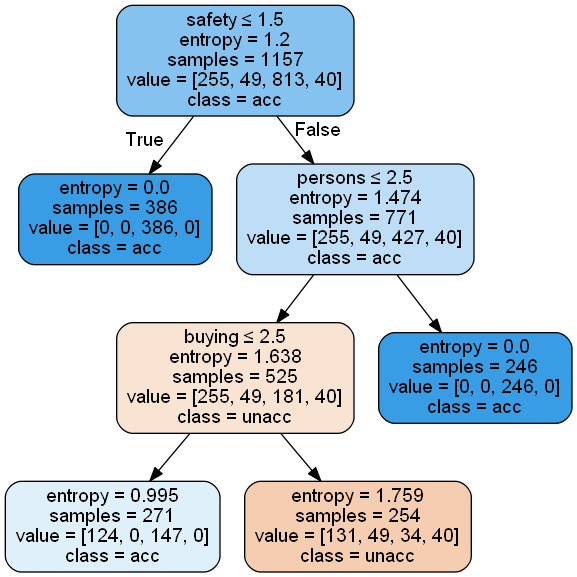

In [16]:
#Vẽ thử cây ra
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train.columns,class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png())

## Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi.

In [17]:
y_train.unique()
max_depths = np.linspace(4, 15, 15, endpoint=True)
max_depths

array([ 4.        ,  4.78571429,  5.57142857,  6.35714286,  7.14285714,
        7.92857143,  8.71428571,  9.5       , 10.28571429, 11.07142857,
       11.85714286, 12.64285714, 13.42857143, 14.21428571, 15.        ])

In [18]:
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth= 5, random_state=1, max_features=None) 
#max_feature=None nghĩa lấy hết các features
#max_depth là độ sâu của cây 
#criterion là chọn phương pháp để đánh giá khi phân chia nhánh, trong lý thuyết mình chỉ được học entropy 

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [19]:
accuracy = clf_gini.score(X_test,y_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy))
#Check accuracy trên tập training để xem model có bị overfitting hay không
print('Training-set accuracy score: {0:0.4f}'. format(clf_gini.score(X_train,y_train)))

Model accuracy score with criterion gini index: 0.8704
Training-set accuracy score: 0.8634


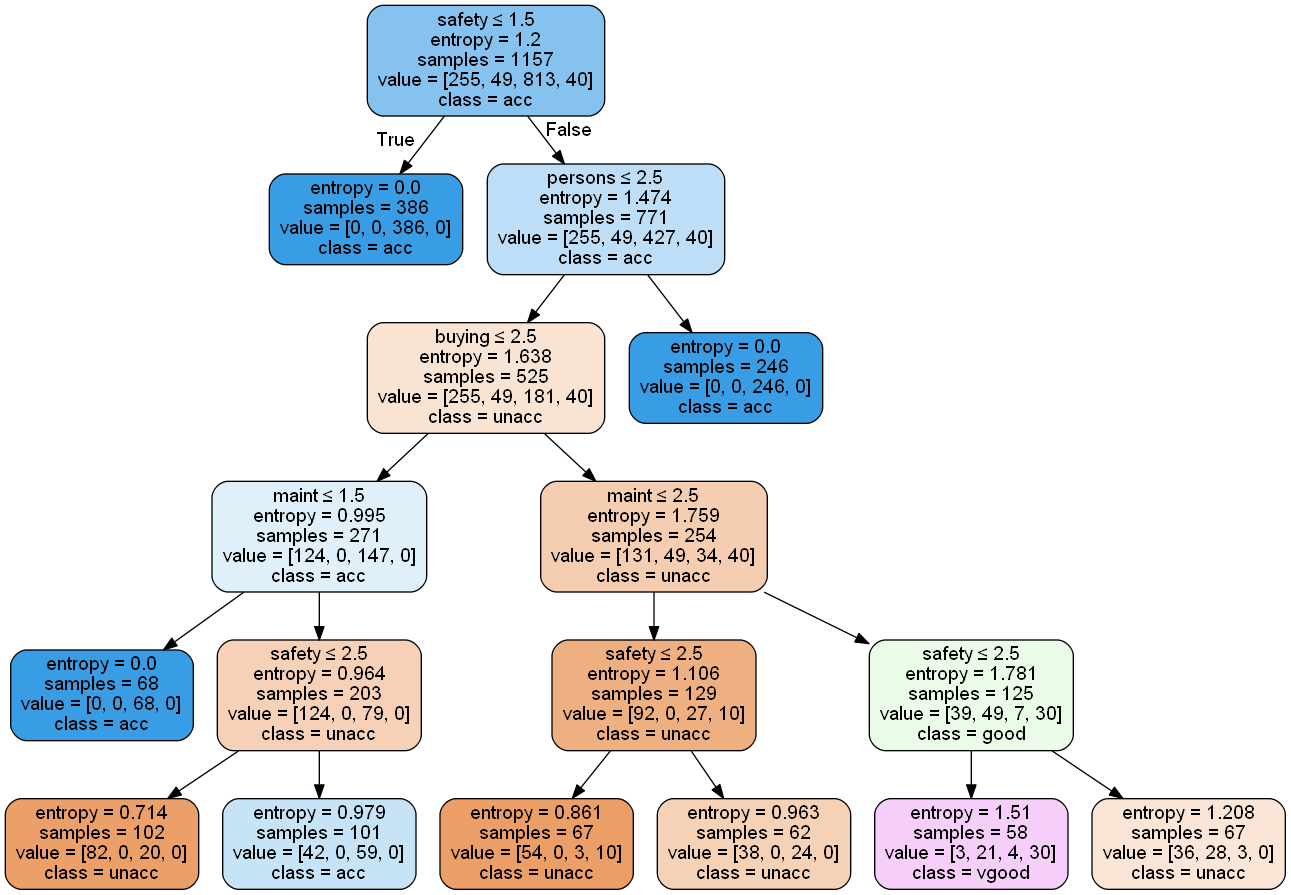

In [20]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train.columns,class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

## max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?

### max_depth là Chiều sâu tối đa của cây. Nếu Không có, thì các nút được mở rộng cho đến khi tất cả các lá đều thuần túy hoặc cho đến khi tất cả các lá chứa ít hơn mẫu min_samples_split.

### Theo lý thuyết độ sâu  tối đa mà cây quyết định có thể đạt được nhỏ hơn so với số lượng training sample, nhưng không có thuật toán nào cho phép đạt đến điểm này vì những lý do rõ ràng, một lý do chính là overfitting. Lưu ý ở đây rằng đó là số lượng training sample chứ không phải số lượng feature vì dữ liệu có thể được chia trên cùng một feature nhiều lần.

### max_depth càng tăng thì model có xu hướng tốt lên nhưng phải tránh bị overfitting.

## Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.


Đây là data dự đoán một người có bị bênh tiểu đường hay không

In [21]:
data=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
# check null 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(["Outcome"])].values, data["Outcome"].values,
                                                    test_size=0.3, random_state=42 ,shuffle = False) # 70% training and 30% test

In [25]:
X_train.shape , X_test.shape

((537, 8), (231, 8))

In [26]:
# using Sklearn RandomForestClassifier
clf = RandomForestClassifier( max_depth = 5, random_state= 0, criterion = 'entropy')
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy))
#Check accuracy trên tập training để xem model có bị overfitting hay không
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(clf.score(X_train,y_train)))

Model accuracy score: 0.7879
Training-set accuracy score: 0.8547


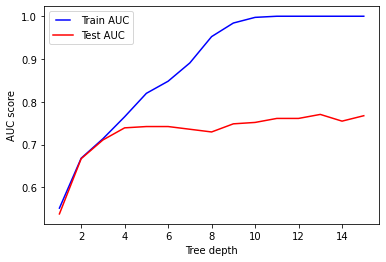

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)

max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = RandomForestClassifier(n_estimators=200, max_depth=max_depth, min_samples_leaf= 1 , random_state=0, criterion='entropy')
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

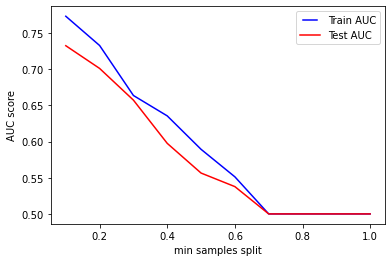

In [28]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = RandomForestClassifier(min_samples_split=min_samples_split , random_state=0)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =   roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

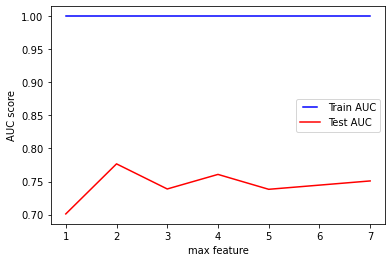

In [29]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    dt = RandomForestClassifier(max_features = max_feature, random_state=0)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =   roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max feature')
plt.show()

In [30]:
# using Sklearn RandomForestClassifier
rd_clf = RandomForestClassifier(n_estimators=500, n_jobs = -1, min_samples_split= 2, min_samples_leaf=1,
                                max_depth = 8, random_state= 0, criterion = 'entropy')
rd_clf.fit(X_train,y_train)
accuracy = rd_clf.score(X_test,y_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy))
#Check accuracy trên tập training để xem model có bị overfitting hay không
print('Training-set accuracy score: {0:0.4f}'. format(rd_clf.score(X_train,y_train)))

Model accuracy score : 0.8009
Training-set accuracy score: 0.9609


In [31]:
estimatorAccuracy=[]
for curEstimator in range(len(rd_clf.estimators_)):
    estimatorAccuracy.append([curEstimator,metrics.accuracy_score(y_test, rd_clf.estimators_[curEstimator].predict(X_test))])

estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)

bestDecisionTree= rd_clf.estimators_[estimatorAccuracy.head(1)['estimatorNumber'].values[0]]
bestDecisionTree

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       random_state=700415551)

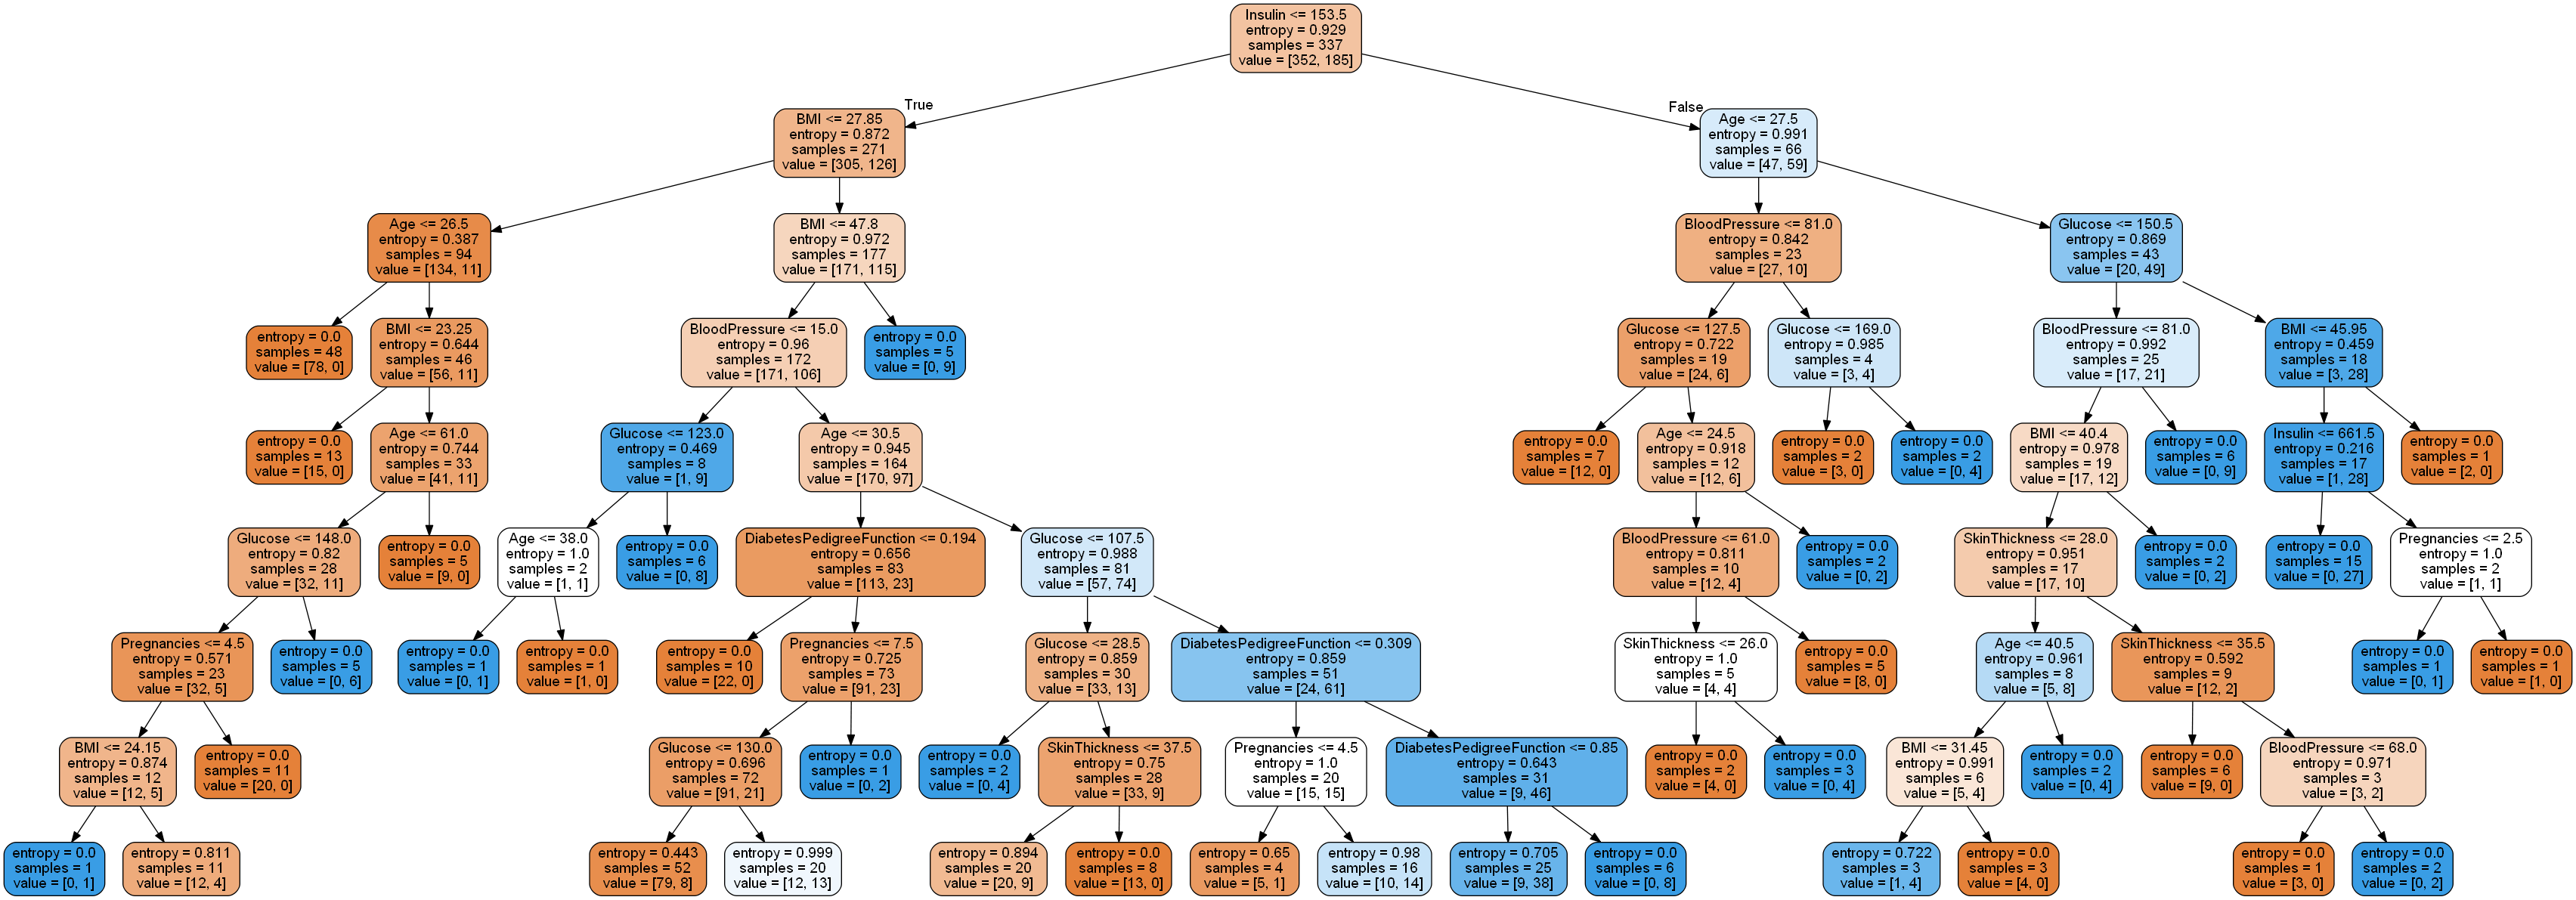

In [32]:
from sklearn import tree
dotfile = StringIO()
i_tree = 0

export_graphviz(bestDecisionTree,out_file='tree.dot',
feature_names=data.columns.difference(["Outcome"]),
filled=True,
rounded=True)
graph = pydotplus.graph_from_dot_file('tree.dot')
#     name = 'tree' + str(i_tree)
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
#     i_tree +=1
Image(graph.create_png())

In [33]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [34]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:
    def __init__(self, n_estimators= 100, max_depth=10 , max_feature = 'auto', min_samples_split =2 , random_state = None ):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_feature = max_feature
        self.random_state = random_state
        self.min_samples_split = min_samples_split
        self.trees = []
    
    def fit(self, X,y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=self.min_samples_split, 
                                          max_features= self.max_feature,max_depth=self.max_depth,
                                          random_state=self.random_state)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)
            
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred) 
            
    

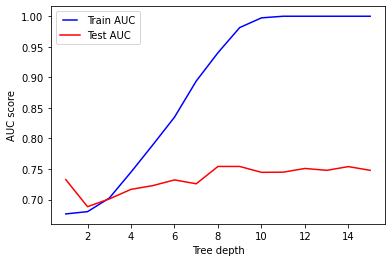

In [35]:
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    RF = RandomForest(n_estimators=500, max_depth=max_depth, max_feature = None ,min_samples_split=2, random_state=0)
    RF.fit(X_train, y_train)
    train_pred = RF.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = RF.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [36]:
clf_RF = RandomForest(n_estimators=500, min_samples_split = 2, max_feature = None, max_depth=8, random_state= 700415551)
clf_RF.fit(X_train,y_train)

In [37]:
y_pred = clf_RF.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Model accuracy score : {0:0.4f}'. format(accuracy))

Model accuracy score : 0.7835


In [38]:
y_pred = clf_RF.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_train,y_pred)))

Training-set accuracy score: 0.9572


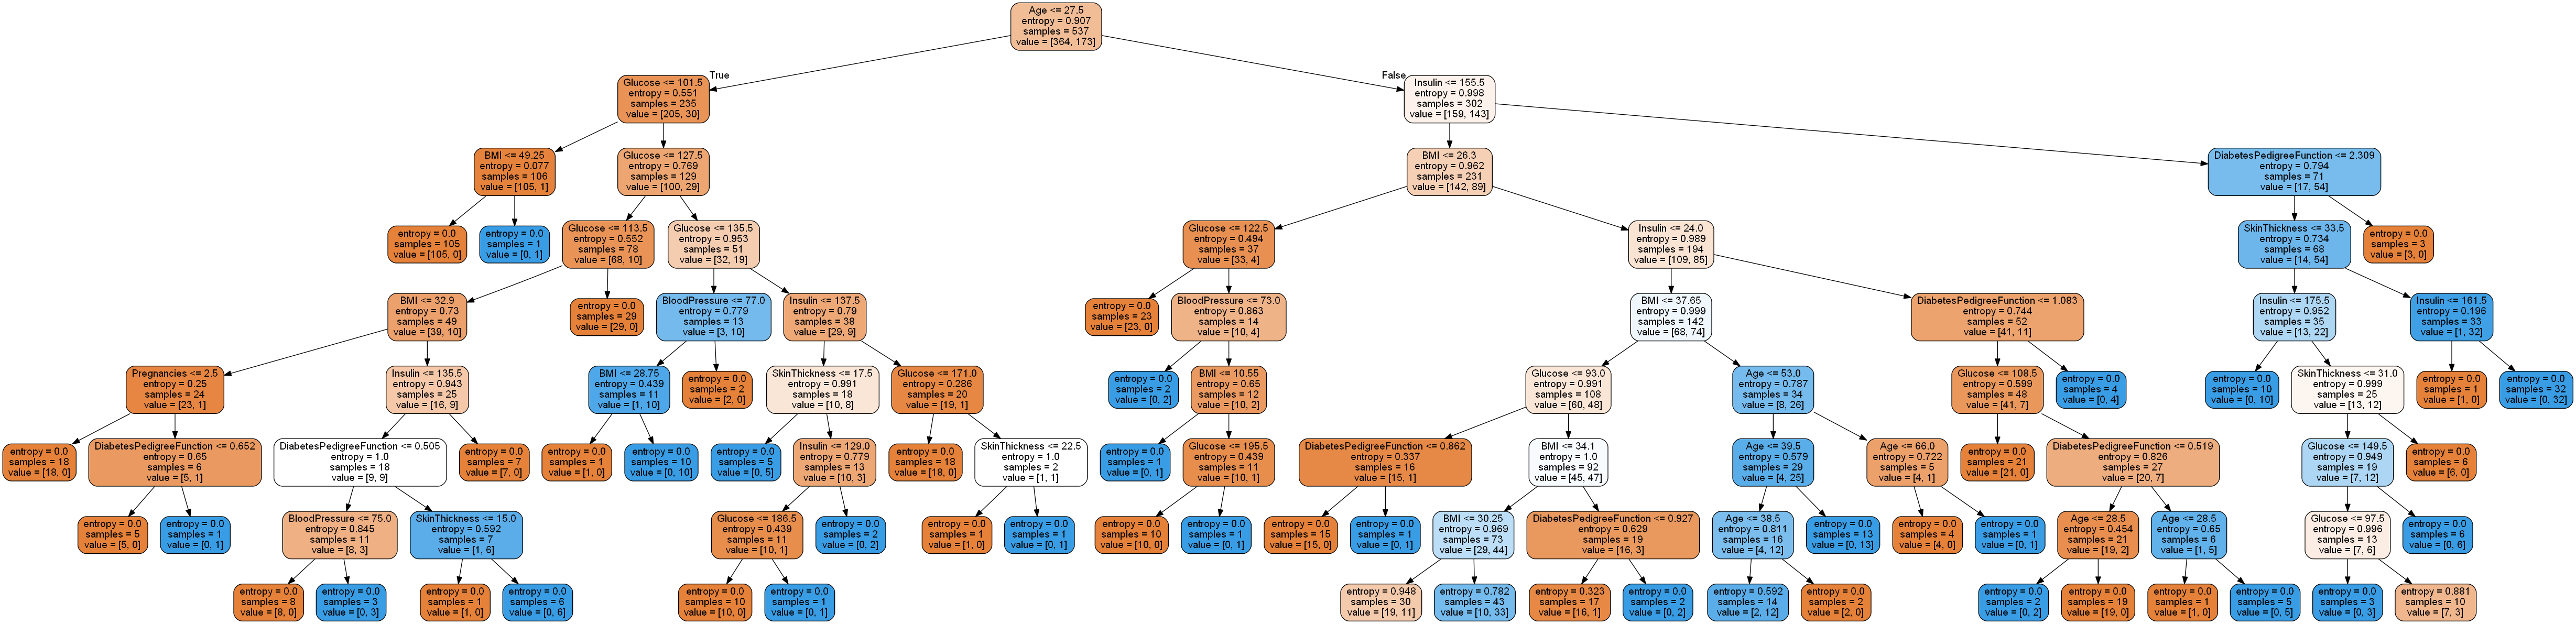

In [41]:
from sklearn import tree
import os
dotfile = StringIO()
i_tree = 0

export_graphviz(clf_RF.trees[-1],out_file='tree.dot',
                feature_names=data.columns.difference(["Outcome"]),
                filled=True,rounded=True)
graph = pydotplus.graph_from_dot_file('tree.dot')
name = 'tree' + str(i_tree)
graph.write_png(name+  '.png')
os.system('dot -Tpng tree.dot -o tree.png')
Image(graph.create_png())